In [1]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 20.01 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 14.9 MB/s 
     |████████████████████████████████| 453 kB 75.2 MB/s 
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-08-11 07:58:25--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22e9:9f55, 2406:da00:ff00::22c5:2ef4, ...
Connecting to bitbucket.org (

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
total_data = pd.read_csv('/content/voice.csv', encoding='utf-8')
total_data=total_data.sample(frac=1).reset_index(drop=True)
print('전체 데이터 개수 :',len(total_data)) # 전체 데이터 개수 출력

전체 데이터 개수 : 1356


In [6]:
total_data

,label,content
0,voicephishing,\n예 이해 되십니까 예 수고하십니다. 저는 서울중앙지검 수사관입니다.\n아니에요....
1,normal,안녕하십니까? 콜센터입니다. 안녕하세요. 문의 좀 드릴게요. 저희가 코로나 여기 병...
2,voicephishing,\n서울중앙지검에 박상원입니다. 네 예 다름이 아니라 본인과 연루된 불법 명의 도용...
3,voicephishing,\n효과가 없으시기 때문에 녹취로성 역시 조사를 진행할 건데 그리고 이게 개인 휴대...
4,normal,"ㅇㅇㅇ입니다. 고객님 무엇을 도와드릴까요? 아, 운동화 아 네 지금 방송 중인 월..."
...,...,...
1351,voicephishing,\n박수 확인하는 사람은 네 전혀 모르세요. \n남성이신데 전혀 모르시는 상황입니까...
1352,voicephishing,\n남성이신데 모르세요. 왜냐하면 저희 남부지검에서 이날 금융범죄 사기단을 고발을 ...
1353,voicephishing,\n네 당사자 본인의 문제가 맞습니까\n네\n네 당사자 본인께서는 출신의 42세 남...
1354,normal,안녕하세요. 콜센터입니다. ㅇㅇㅇ선생님이신가요? 네 ㅇㅇㅇ입니다. 지금 ㅇㅇㅇㅇ시스...


In [7]:
total_data['label'] = total_data['label'].replace(['normal','voicephishing'],[0,1])
total_data

,label,content
0,1,\n예 이해 되십니까 예 수고하십니다. 저는 서울중앙지검 수사관입니다.\n아니에요....
1,0,안녕하십니까? 콜센터입니다. 안녕하세요. 문의 좀 드릴게요. 저희가 코로나 여기 병...
2,1,\n서울중앙지검에 박상원입니다. 네 예 다름이 아니라 본인과 연루된 불법 명의 도용...
3,1,\n효과가 없으시기 때문에 녹취로성 역시 조사를 진행할 건데 그리고 이게 개인 휴대...
4,0,"ㅇㅇㅇ입니다. 고객님 무엇을 도와드릴까요? 아, 운동화 아 네 지금 방송 중인 월..."
...,...,...
1351,1,\n박수 확인하는 사람은 네 전혀 모르세요. \n남성이신데 전혀 모르시는 상황입니까...
1352,1,\n남성이신데 모르세요. 왜냐하면 저희 남부지검에서 이날 금융범죄 사기단을 고발을 ...
1353,1,\n네 당사자 본인의 문제가 맞습니까\n네\n네 당사자 본인께서는 출신의 42세 남...
1354,0,안녕하세요. 콜센터입니다. ㅇㅇㅇ선생님이신가요? 네 ㅇㅇㅇ입니다. 지금 ㅇㅇㅇㅇ시스...


In [8]:
total_data['content'].nunique(), total_data['label'].nunique()

(1351, 2)

In [9]:
total_data.drop_duplicates(subset=['content'], inplace=True) # content 열에서 중복인 내용이 있다면 중복 제거
print('총 데이터 수 :',len(total_data))

총 데이터 수 : 1351


In [10]:
print(total_data.isnull().values.any())

False


In [11]:
train_data, test_data = train_test_split(total_data, test_size = 0.3, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 945
테스트용 리뷰의 개수 : 406


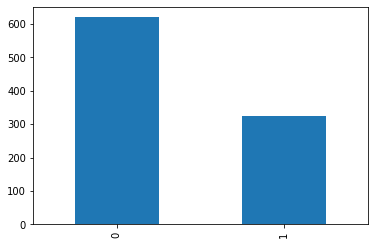

In [12]:
train_data['label'].value_counts().plot(kind = 'bar')

In [13]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0    620
1      1    325


In [14]:
# 한글과 공백을 제외하고 모두 제거
train_data['content'] = train_data['content'].str.replace("[^가-힣 ]","")
train_data['content'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())
print(train_data)

label      0
content    0
dtype: int64
      label                                            content
12        0  쇼핑 입니다 고객님 무엇을 도와 드릴까요 아 제가 지금 침구 세트를 보고 있는데요 ...
1320      0  안녕하세요 쇼핑 입니다 고객님 맞습니까 네 맞아요 네 고객님 주문하신 상품 제가 다...
172       1  네 여보세요 네네 다른 게 아니라 본인과 연루된 명의도용 한 건이 저희 쪽에 접수가...
599       0   쇼핑 입니다 고객님 무엇을 도와 드릴까요  예 지금 방송하는 거 주문할려고 하는데...
1347      0  네 쇼핑입니다 안녕하세요 네 안녕하세요 고객님 무엇을 도와 드릴까요 네 며칠 전에 ...
...     ...                                                ...
1098      1  몇 가지 확인차 연락드렸는데요 본인께서는 전라도 광주 출신인 세 여성 이현주 씨라고...
1134      1  뭐라고요예 지인분들까지 전부 다 확보하였다구요 예 지금 이거 유포할까요 아니면 이대...
1299      1       잠시만요전화하셔서요 대출 직장인 신용대출 좀 받으려고 하는데요 예를 들어서...
862       1  똑바로 얘기하라고 해 신고하면 내 진짜 죽여버린다 여보세요 나는 돈이 필요해가지고 ...
1130      0  쇼핑 입니다 무엇을 도와드릴까요 네 저기 방송하는 신발 좀 구입하려고요 네 고객님 ...

[945 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [15]:
test_data.drop_duplicates(subset = ['content'], inplace=True) # 중복 제거
test_data['content'] = test_data['content'].str.replace("[^가-힣 ]","") # 정규 표현식 수행
test_data['content'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))
print(test_data)

전처리 후 테스트용 샘플의 개수 : 406
      label                                            content
371       0  안녕하세요 쇼핑 입니다 네 안녕하세요 고객님 되십니까 아닌데요 이요 다시 한번 말씀...
266       0  쇼핑 입니다 네 지금 방송되는 매트 구매할려고요 아 그러십니까 쇼핑 처음 이용이시면...
313       0  안녕하십니까 방금 통화했던 쇼핑 상담원입니다 아 네 고객님 맞습니까 맞아요 네 고객...
636       1  그는 본인께서도 인지를 못 하시는 건지 확인을 좀 부탁드릴게요 본인 혹시 중고나라 ...
581       0  안녕하세요 쇼핑 입니다 무엇을 도와드릴까요 네 수고하십니다 텔레비에서 운동화를 봤는...
...     ...                                                ...
319       0   입니다  네 수고하십니다  그거 저기 주문 좀 할라고 해서 좀 문의 좀 해볼라구요...
1046      1  여보세요 예 여보세요네 분실당하거나 도난당한 적은 없습니까 네 네 그럼 혹시 지난 ...
83        0  행복을 전하는 쇼핑 상담사 입니다 네 지금 방송하는 상품 카드로 결제하려고 하는데요...
129       0  행복을 전하는  입니다 네 지금 방송에 나오는 청바지 주문하려구요  아 그러십니까 ...
783       0  안녕하십니까 쇼핑 입니다 네 지금 선전하는 거 사려고요 아 그러십니까 저희 쇼핑 처...

[406 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [66]:
stopwords = "너 내 오 와 거 제 게 나 뭐 것 원 이 백 수 십 일 거기 요예 입니다"
stopwords = stopwords.split(' ')

In [67]:
mecab = Mecab() 

train_data['tokenized'] = train_data['content'].apply(mecab.nouns)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
test_data['tokenized'] = test_data['content'].apply(mecab.nouns)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [33]:
train_data['tokenized']
train_data

,label,content,tokenized
12,0,쇼핑 입니다 고객님 무엇을 도와 드릴까요 아 제가 지금 침구 세트를 보고 있는데요 ...,"[쇼핑, 고객, 무엇, 침구, 세트, 방송, 중, 마르시아, 쿨, 서커, 침구, 세..."
1320,0,안녕하세요 쇼핑 입니다 고객님 맞습니까 네 맞아요 네 고객님 주문하신 상품 제가 다...,"[안녕, 쇼핑, 고객, 고객, 주문, 상품, 주문, 전화, 고객, 저희, 쇼핑, 상..."
172,1,네 여보세요 네네 다른 게 아니라 본인과 연루된 명의도용 한 건이 저희 쪽에 접수가...,"[본인, 연루, 명의, 건, 저희, 쪽, 접수, 확인, 연락, 본인, 중고, 나라,..."
599,0,쇼핑 입니다 고객님 무엇을 도와 드릴까요 예 지금 방송하는 거 주문할려고 하는데...,"[쇼핑, 고객, 무엇, 방송, 주문, 고객, 쇼핑, 처음, 이용, 고객, 정보, 등..."
1347,0,네 쇼핑입니다 안녕하세요 네 안녕하세요 고객님 무엇을 도와 드릴까요 네 며칠 전에 ...,"[쇼핑, 안녕, 고객, 무엇, 며칠, 전, 신발, 주문, 고객, 사이즈, 이게, 발..."
...,...,...,...
1098,1,몇 가지 확인차 연락드렸는데요 본인께서는 전라도 광주 출신인 세 여성 이현주 씨라고...,"[가지, 확인, 차, 연락, 본인, 전라도, 광주, 출신, 여성, 이현주, 씨, 저..."
1134,1,뭐라고요예 지인분들까지 전부 다 확보하였다구요 예 지금 이거 유포할까요 아니면 이대...,"[지인, 확보, 이거, 유포, 저, 말씀, 저, 해외, 해외, 해외, 말씀, 저, ..."
1299,1,잠시만요전화하셔서요 대출 직장인 신용대출 좀 받으려고 하는데요 예를 들어서...,"[만요, 전화, 대출, 직장, 신용, 대출, 예, 본인, 돈, 필요, 돈, 정상, ..."
862,1,똑바로 얘기하라고 해 신고하면 내 진짜 죽여버린다 여보세요 나는 돈이 필요해가지고 ...,"[얘기, 신고, 돈, 필요, 혜린, 사람, 사람, 전화, 줄, 신고, 전화]"


In [34]:
normal_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
voicephishing_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [35]:
normal_word_count = Counter(normal_words)
print(normal_word_count.most_common(20))

[('고객', 4759), ('확인', 3635), ('카드', 3133), ('부탁', 2993), ('주문', 2760), ('말씀', 2362), ('결제', 2138), ('감사', 2137), ('번호', 1994), ('상품', 1987), ('등록', 1123), ('주소', 1122), ('배송', 1101), ('정보', 1056), ('전화', 1002), ('삼', 991), ('성함', 952), ('반품', 910), ('교환', 886), ('사이즈', 878)]


In [36]:
voicephishing_word_count = Counter(voicephishing_words)
print(voicephishing_word_count.most_common(20))

[('본인', 3058), ('저희', 2386), ('말씀', 1567), ('통장', 1497), ('은행', 1495), ('고객', 1297), ('계좌', 1227), ('부분', 1197), ('사건', 1144), ('확인', 1115), ('때문', 962), ('금융', 938), ('전화', 875), ('사용', 848), ('진행', 742), ('조사', 730), ('분', 701), ('하나', 698), ('번호', 697), ('번', 686)]


보이스피싱 데이터의 평균 길이 : 324.4676923076923
일반 데이터의 평균 길이 : 181.7483870967742


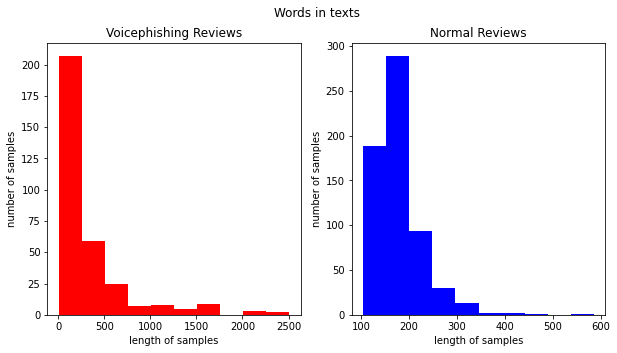

In [37]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Voicephishing Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('보이스피싱 데이터의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Normal Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('일반 데이터의 평균 길이 :', np.mean(text_len))
plt.show()

In [38]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [39]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [40]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 7076
등장 빈도가 1번 이하인 희귀 단어의 수: 2927
단어 집합에서 희귀 단어의 비율: 41.36517806670435
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.3418234495910808


In [41]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 4151


In [42]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [43]:
print(X_train[:3])

[[54, 2, 154, 2388, 162, 77, 43, 3227, 1192, 1, 2388, 162, 4, 420, 1795, 45, 420, 39, 232, 39, 1, 17, 4, 2, 232, 385, 4, 2388, 162, 385, 77, 43, 232, 385, 2389, 2390, 2137, 13, 158, 38, 56, 427, 38, 56, 45, 420, 45, 309, 68, 94, 1795, 45, 158, 68, 94, 45, 427, 68, 94, 1402, 38, 33, 68, 94, 2732, 420, 59, 168, 58, 59, 9, 9, 27, 9, 774, 881, 234, 774, 157, 45, 162, 9, 162, 420, 427, 68, 94, 2, 18, 3, 48, 9, 2, 32, 144, 3, 8, 18, 3, 11, 13, 274, 105, 1403, 193, 26, 3, 8, 3, 11, 12, 5, 277, 12, 5, 139, 172, 22, 214, 5, 3, 5, 259, 50, 4, 8, 248, 3, 11, 2, 53, 140, 50, 4, 8, 3, 11, 158, 68, 38, 198, 37, 70, 2, 129, 12, 5, 104, 114, 106, 47, 173, 580, 171, 108, 10, 62, 50, 79, 8, 47], [191, 54, 2, 2, 9, 13, 9, 14, 2, 7, 54, 13, 114, 106, 9, 56, 100, 228, 27, 2, 9, 119, 133, 100, 78, 228, 133, 100, 228, 56, 100, 9, 37, 56, 100, 119, 7, 9, 31, 128, 30, 2, 481, 9, 52, 41, 96, 48, 346, 24, 9, 99, 76, 494, 365, 408, 83, 346, 12, 3228, 910, 2733, 21, 82, 37, 2734, 12, 5, 10, 259, 50, 4, 8, 323, 271

In [44]:
print(X_test[:3])

[[191, 54, 191, 2, 20, 4, 8, 1, 58, 7, 46, 32, 22, 13, 2, 31, 172, 3, 69, 41, 32, 64, 1, 58, 64, 2, 64, 13, 565, 157, 41, 2777, 41, 101, 942, 21, 9, 539, 203, 2333, 162, 4, 424, 197, 201, 23, 13, 293, 494, 365, 35, 314, 103, 170, 183, 177, 241, 177, 220, 105, 1335, 193, 26, 4, 8, 282, 130, 192, 11, 41, 96, 517, 1, 62, 2569, 93, 1, 62, 391, 1930, 155, 1612, 20, 183, 737, 494, 365, 408, 83, 183, 429, 170, 28, 271, 968, 1028, 1, 1612, 41, 58, 41, 41, 58, 13, 3798, 62, 1028, 7, 304, 585, 17, 25, 391, 63, 2, 796, 173, 346, 13, 273, 3, 494, 365, 408, 83, 346, 30, 11, 13, 136], [54, 77, 1456, 348, 54, 121, 81, 18, 22, 48, 9, 2, 160, 102, 216, 32, 53, 231, 26, 144, 22, 123, 11, 32, 53, 3, 8, 4, 165, 10, 3, 8, 26, 3, 8, 225, 518, 3, 11, 230, 13, 102, 215, 76, 252, 9, 76, 257, 2, 77, 43, 4107, 2389, 2885, 1456, 309, 68, 13, 13, 157, 3, 8, 224, 12, 5, 12, 24, 5, 5, 10, 3, 8, 11, 5, 911, 34, 6, 32, 57, 750, 5, 2, 5, 166, 72, 3, 8, 3, 11, 309, 38, 56, 133, 5, 12, 24, 12, 11, 2, 87, 20, 12, 5, 18, 2

리뷰의 최대 길이 : 2510
리뷰의 평균 길이 : 230.83174603174604


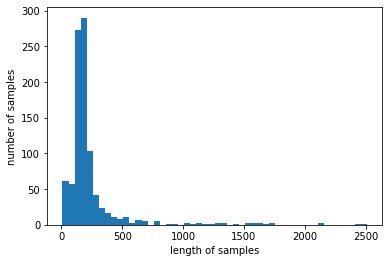

In [45]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [46]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [49]:
max_len = 500
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 500 이하인 샘플의 비율: 93.54497354497354


In [50]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

모델 학습

In [51]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

BiLSTM

In [52]:
import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(hidden_units))) # Bidirectional LSTM을 사용
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
mc = ModelCheckpoint('lstm_best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc', f1_m, precision_m, recall_m])
history = model.fit(X_train, y_train, epochs=10, callbacks=[es, mc], batch_size=32, validation_split=0.2)

Epoch 1/10
23/24 [===========================>..] - ETA: 0s - loss: 0.5025 - acc: 0.7120 - f1_m: 0.1351 - precision_m: 0.2464 - recall_m: 0.0990
Epoch 1: val_acc improved from -inf to 0.99471, saving model to lstm_best_model.h5
24/24 [==============================] - 12s 79ms/step - loss: 0.4997 - acc: 0.7169 - f1_m: 0.1665 - precision_m: 0.2778 - recall_m: 0.1282 - val_loss: 0.3103 - val_acc: 0.9947 - val_f1_m: 0.9933 - val_precision_m: 1.0000 - val_recall_m: 0.9872
Epoch 2/10
23/24 [===========================>..] - ETA: 0s - loss: 0.2242 - acc: 0.9823 - f1_m: 0.9725 - precision_m: 0.9827 - recall_m: 0.9651
Epoch 2: val_acc did not improve from 0.99471
24/24 [==============================] - 1s 35ms/step - loss: 0.2208 - acc: 0.9828 - f1_m: 0.9736 - precision_m: 0.9835 - recall_m: 0.9666 - val_loss: 0.1469 - val_acc: 0.9947 - val_f1_m: 0.9933 - val_precision_m: 1.0000 - val_recall_m: 0.9872
Epoch 3/10
23/24 [===========================>..] - ETA: 0s - loss: 0.1208 - acc: 0.9851 - f

In [53]:
loaded_model = load_model('lstm_best_model.h5', custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m})
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

13/13 [==============================] - 2s 24ms/step - loss: 0.0395 - acc: 0.9926 - f1_m: 0.9881 - precision_m: 0.9846 - recall_m: 0.9936
테스트 정확도: 0.9926


BiLSTM 모델 평가

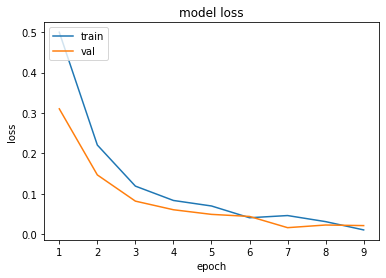

In [54]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

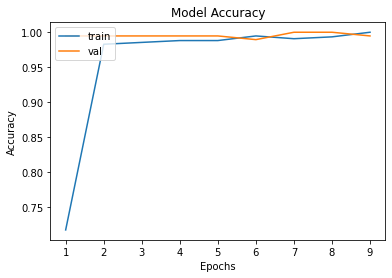

In [55]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

RNN

In [56]:
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import f1_score
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
mc = ModelCheckpoint('rnn_best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc', f1_m, precision_m, recall_m])
history = model.fit(X_train, y_train, epochs=10, callbacks=[es, mc], batch_size=16, validation_split=0.2)

Epoch 1/10
48/48 [==============================] - ETA: 0s - loss: 0.5764 - acc: 0.6958 - f1_m: 0.3151 - precision_m: 0.4992 - recall_m: 0.2699
Epoch 1: val_acc improved from -inf to 0.82011, saving model to rnn_best_model.h5
48/48 [==============================] - 27s 537ms/step - loss: 0.5764 - acc: 0.6958 - f1_m: 0.3151 - precision_m: 0.4992 - recall_m: 0.2699 - val_loss: 0.4630 - val_acc: 0.8201 - val_f1_m: 0.6999 - val_precision_m: 1.0000 - val_recall_m: 0.5667
Epoch 2/10
48/48 [==============================] - ETA: 0s - loss: 0.2708 - acc: 0.9312 - f1_m: 0.8438 - precision_m: 0.8965 - recall_m: 0.8353
Epoch 2: val_acc improved from 0.82011 to 0.97354, saving model to rnn_best_model.h5
48/48 [==============================] - 23s 476ms/step - loss: 0.2708 - acc: 0.9312 - f1_m: 0.8438 - precision_m: 0.8965 - recall_m: 0.8353 - val_loss: 0.1559 - val_acc: 0.9735 - val_f1_m: 0.9692 - val_precision_m: 0.9861 - val_recall_m: 0.9545
Epoch 3/10
48/48 [==============================] -

In [57]:
loaded_model = load_model('rnn_best_model.h5', custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m})
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

13/13 [==============================] - 1s 39ms/step - loss: 0.0861 - acc: 0.9778 - f1_m: 0.9675 - precision_m: 0.9581 - recall_m: 0.9805
테스트 정확도: 0.9778


RNN 모델 평가

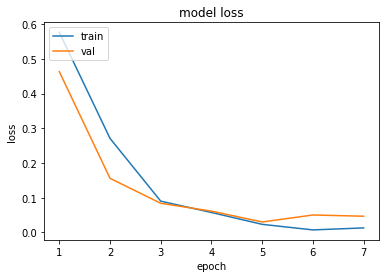

In [58]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

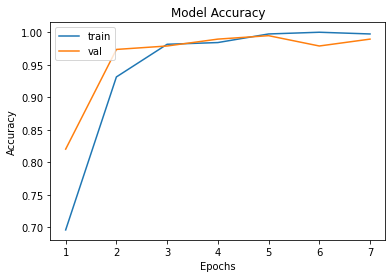

In [59]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

예측

In [68]:
def sentiment_predict(new_sentence,model_name):
  loaded_model = load_model(model_name, custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m})
  new_sentence = re.sub(r'[^가-힣 ]','', new_sentence)
  new_sentence = mecab.nouns(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  print(new_sentence)
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 보이스피싱 데이터입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 일반 데이터입니다.".format((1 - score) * 100))

In [70]:
sentiment_predict('그래서 내가 b/ 거기 사줄 거야? 이랬더니 자기가 오면 사준대. 그래서 b/ 수능 끝나고 사주겠대. u/ 어케이 했는데 그래 내가 수능 끝나고 너 초밥 사주기로 했잖아, 라고 하니까, b/ 거기 오+ 목동까지 가기 너무 귀찮은데 그냥 만수차 가가지고 거기 초밥 뷔페 먹으면 안 되냐는 거야. b/ 그/ 내가 아/ 일단 알았다 했어.',
                  'lstm_best_model.h5')
sentiment_predict('그래서 내가 b/ 거기 사줄 거야? 이랬더니 자기가 오면 사준대. 그래서 b/ 수능 끝나고 사주겠대. u/ 어케이 했는데 그래 내가 수능 끝나고 너 초밥 사주기로 했잖아, 라고 하니까, b/ 거기 오+ 목동까지 가기 너무 귀찮은데 그냥 만수차 가가지고 거기 초밥 뷔페 먹으면 안 되냐는 거야. b/ 그/ 내가 아/ 일단 알았다 했어.',
                  'rnn_best_model.h5')

['자기', '수능', '끝', '케이', '수능', '끝', '초밥', '목동', '만수', '차', '초밥', '뷔페']
96.33% 확률로 보이스피싱 데이터입니다.
['자기', '수능', '끝', '케이', '수능', '끝', '초밥', '목동', '만수', '차', '초밥', '뷔페']
97.40% 확률로 보이스피싱 데이터입니다.
